In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io

In [26]:
uploaded = files.upload()


Saving Reviews.csv to Reviews.csv


In [27]:
df = pd.read_csv(io.BytesIO(uploaded['Reviews.csv']))

# Visualization

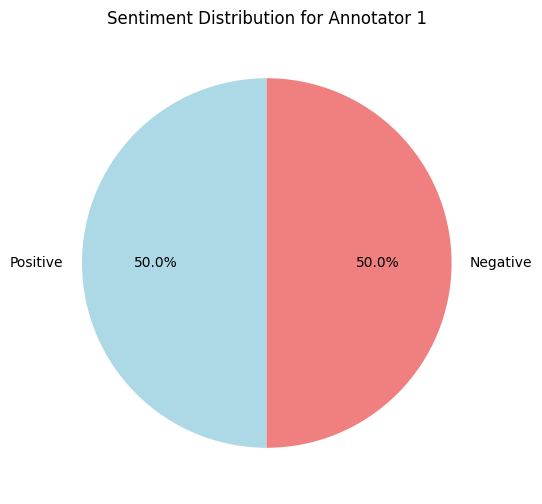

In [28]:
# Data for Annotator 1
annotator_1_counts = df['Annotator 1'].value_counts()
# Create a pie chart for Annotator 1
plt.figure(figsize=(8, 6))
plt.pie(
    annotator_1_counts,
    labels=annotator_1_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightcoral', 'lightgreen']
)
plt.title("Sentiment Distribution for Annotator 1")
plt.show()

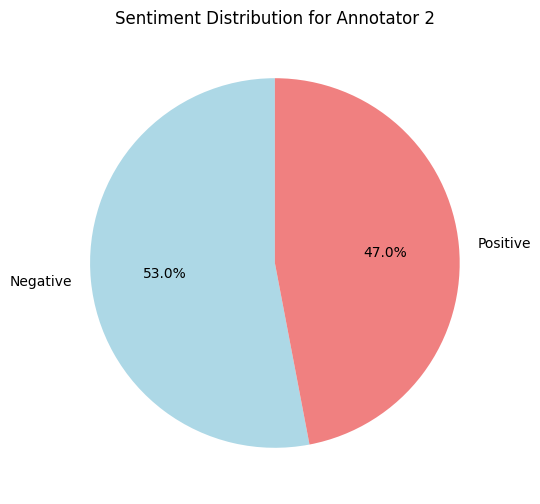

In [29]:
# Data for Annotator 2
annotator_2_counts = df['Annotator 2'].value_counts()
# Create a pie chart for Annotator 2
plt.figure(figsize=(8, 6))
plt.pie(
    annotator_2_counts,
    labels=annotator_2_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightcoral', 'lightgreen']
)
plt.title("Sentiment Distribution for Annotator 2")
plt.show()

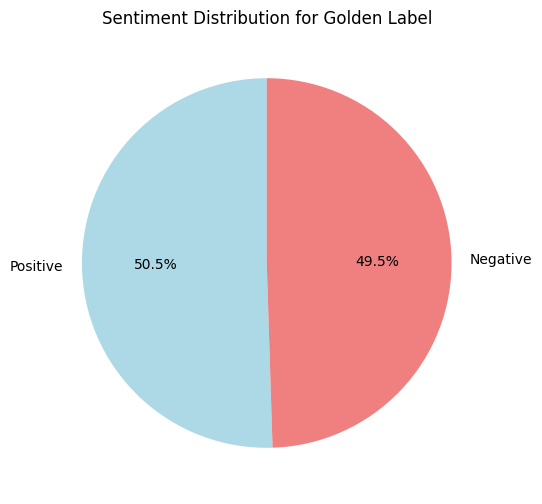

In [30]:
# Data for Golden Label
golden_label_counts = df['Golden Label'].value_counts()
# Create a pie chart for Golden Label
plt.figure(figsize=(8, 6))
plt.pie(
    golden_label_counts,
    labels=golden_label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightcoral', 'lightgreen']
)
plt.title("Sentiment Distribution for Golden Label")
plt.show()

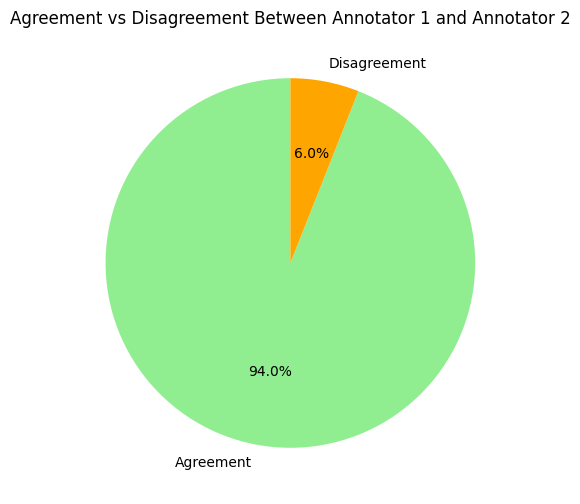

In [31]:
# Calculate agreement and disagreement between Annotator 1 and Annotator 2
agreement = (df['Annotator 1'] == df['Annotator 2']).sum()
disagreement = len(df) - agreement

# Data for pie chart
labels = ["Agreement", "Disagreement"]
values = [agreement, disagreement]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=["lightgreen", "orange"]
)
plt.title("Agreement vs Disagreement Between Annotator 1 and Annotator 2")
plt.show()

In [32]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(df['Annotator 1'], df['Annotator 2'])

print(f"Cohen's Kappa: {kappa:.2f}")

Cohen's Kappa: 0.88


# Preprocessing

In [33]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [34]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# Text Cleaning Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [36]:
def preprocess_text(text):
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()  # Convert to lowercase
    # Remove stopwords and apply lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['Cleaned Reviews'] = df['Reviews'].apply(preprocess_text)

In [37]:
# Vectorize the Text
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['Cleaned Reviews']).toarray()

In [38]:
#  Encode Labels
encoder = LabelEncoder()
y = encoder.fit_transform(df['Golden Label'])

In [39]:

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Output Preprocessed Data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (160, 4829)
X_test shape: (40, 4829)
y_train shape: (160,)
y_test shape: (40,)


# Neural Network

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
#Build the Neural Network
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
# Train the Model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32,
                    verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.5833 - loss: 0.6910 - val_accuracy: 0.4375 - val_loss: 0.6927
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8115 - loss: 0.6789 - val_accuracy: 0.4688 - val_loss: 0.6907
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9260 - loss: 0.6629 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9406 - loss: 0.6393 - val_accuracy: 0.5312 - val_loss: 0.6847
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9385 - loss: 0.6062 - val_accuracy: 0.5312 - val_loss: 0.6787
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9771 - loss: 0.5717 - val_accuracy: 0.5625 - val_loss: 0.6700
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9802 - loss: 0.5215 - val_accuracy: 0.6250 - val_loss: 0.6573
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9917 - loss: 0.4598 - val_accuracy: 0.7188 - val_loss: 0.6425

In [45]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.80


In [46]:
#Generate Predictions and Metrics
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        21
           1       0.70      1.00      0.83        19

    accuracy                           0.80        40
   macro avg       0.85      0.81      0.80        40
weighted avg       0.86      0.80      0.79        40


Confusion Matrix:
[[13  8]
 [ 0 19]]


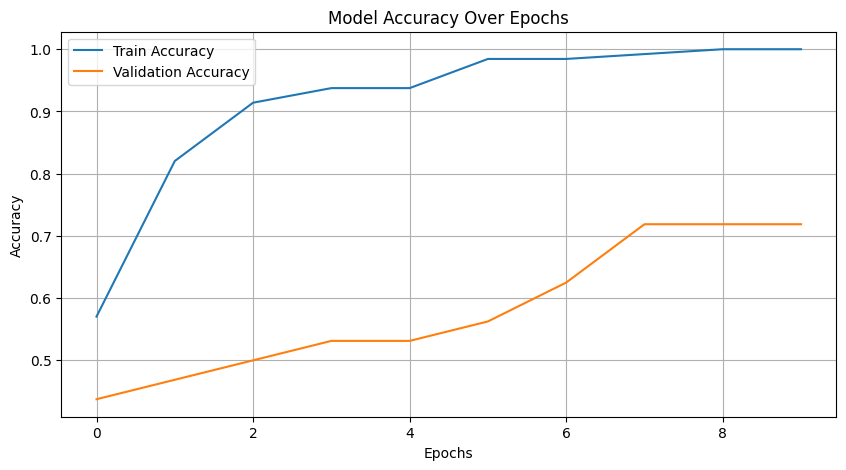

In [47]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


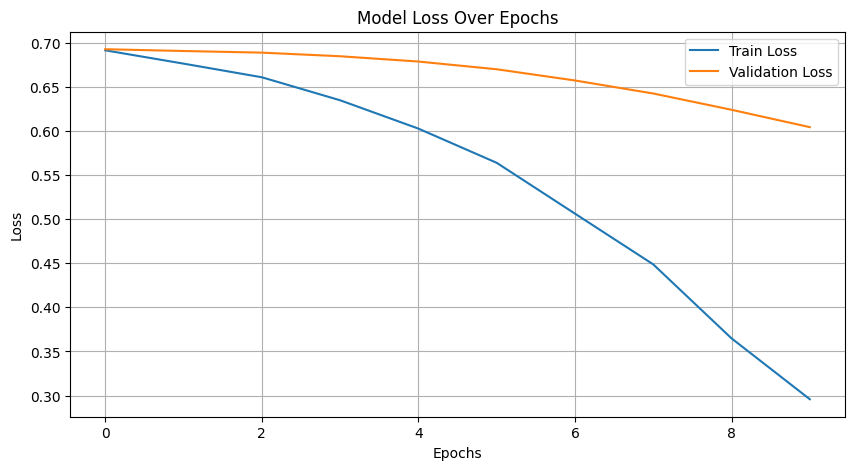

In [48]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()